<a href="https://colab.research.google.com/github/irwardhana/DEVSAT_ENV/blob/main/Tugas_pertemuan_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#kmeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

df = pd.read_csv('data.csv')
df.head()
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
# This cell was removed because the column names did not match the loaded dataset.
# The loaded dataset appears to be related to breast cancer, not customer data.
# The subsequent cells will proceed with clustering and visualization based on the available data.

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


NameError: name 'age' is not defined

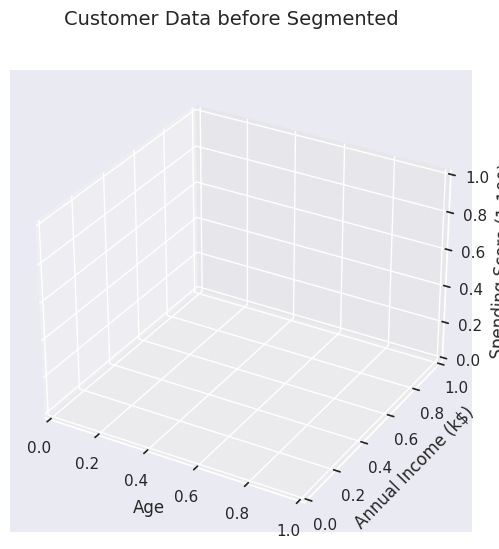

In [21]:
fig = plt.figure(figsize=(8, 6))
fig.suptitle('Customer Data before Segmented', fontsize=14)
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

# Data for three-dimensional scattered points
ax.scatter(age, income, spent);

In [22]:
# For each k value, we will initialise k-means
# and use the inertia attribute to identify
# the sum of squared distances of samples to the nearest cluster centre

# Selecting numerical columns from the breast cancer dataset for clustering
x = df[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
        'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se',
        'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']]

from sklearn.cluster import KMeans
iner=[]

for i in range(1,30):
    kmeans=KMeans(i, n_init=10, random_state=0) # Added n_init to suppress warning and random_state for reproducibility
    kmeans.fit(x)
    iner.append(kmeans.inertia_)

# print(wcss)

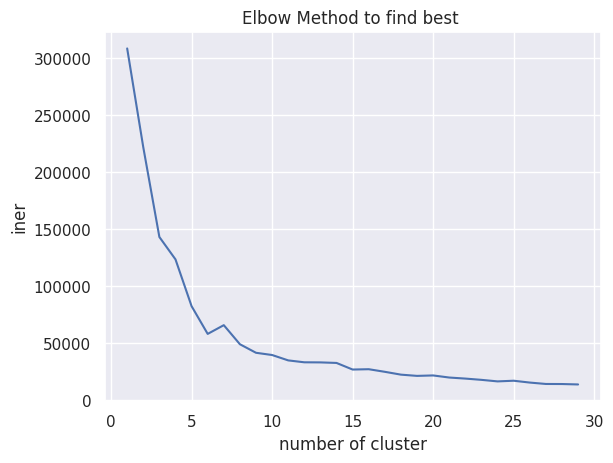

In [ ]:
plt.plot(range(1,30),iner)
plt.title('Elbow Method to find best ')
plt.xlabel('number of cluster')
plt.ylabel('iner')
plt.show()

In [27]:
kmeans = KMeans(6, n_init=10, random_state=0) # Added n_init to suppress warning and random_state for reproducibility
kmeans.fit(x)
x['c_pred']=kmeans.fit_predict(x)
display(x)

/tmp/ipython-input-2104696753.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['c_pred']=kmeans.fit_predict(x)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,c_pred
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,4
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,4
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,5
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,2
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,4
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,5
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,5


In [28]:
np.unique(x['c_pred'])

array([0, 1, 2, 3, 4, 5], dtype=int32)

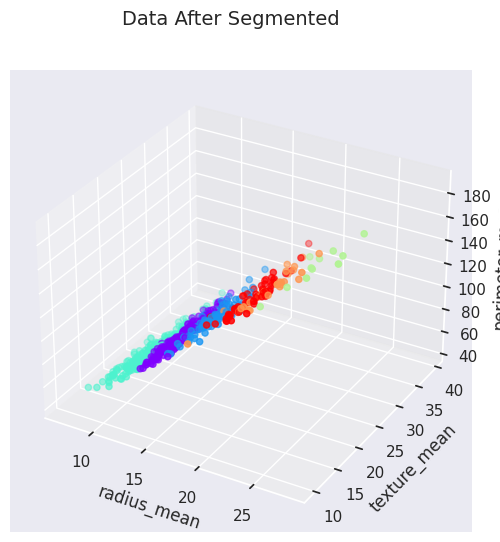

In [29]:
fig = plt.figure(figsize=(8, 6))
fig.suptitle('Data After Segmented', fontsize=14)
ax = fig.add_subplot(111, projection='3d')

# Use the columns from the 'x' DataFrame for plotting
ax.set_xlabel('radius_mean')
ax.set_ylabel('texture_mean')
ax.set_zlabel('perimeter_mean')

# Data for three-dimensional scattered points
# Use columns from the 'x' DataFrame for plotting
ax.scatter(x['radius_mean'], x['texture_mean'], x['perimeter_mean'], c=x['c_pred'], cmap='rainbow')

# import plotly

Text(0.5, 0, 'perimeter_mean')

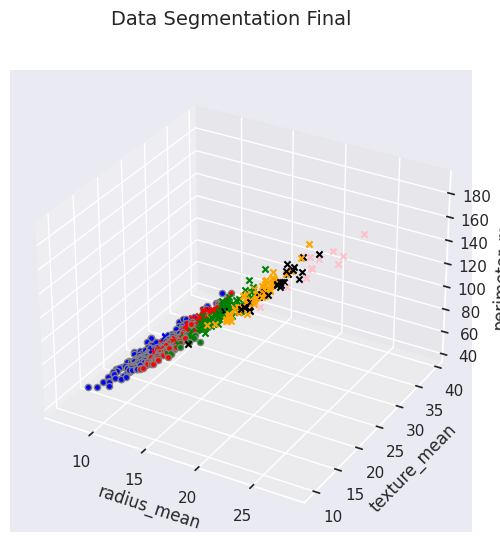

In [30]:
colors = ['red' if i == 0 else 'green' if i == 1 else 'blue' if i == 2 else 'pink' if i == 3 else 'black' if i == 4 else 'orange' for i in list(x['c_pred'])]
# Markers based on the 'diagnosis' column from the original df
markers = ['x' if q == 'M' else 'o' for q in list(df['diagnosis'])]

fig = plt.figure(figsize=(8, 6))
t = fig.suptitle('Data Segmentation Final', fontsize=14)
ax = fig.add_subplot(111, projection='3d')

# Use the columns from the 'x' DataFrame for plotting
# Using radius_mean, texture_mean, and perimeter_mean as examples from the breast cancer dataset
xs = list(x['radius_mean'])
ys = list(x['texture_mean'])
zs = list(x['perimeter_mean'])

data_points = [(x_val, y_val, z_val) for x_val, y_val, z_val in zip(xs, ys, zs)]

for data, color, mark in zip(data_points, colors, markers):
    x_val, y_val, z_val = data
    if mark == 'x':
      ax.scatter(x_val, y_val, z_val, c=color, facecolors='gray', marker=mark)
    else:
      ax.scatter(x_val, y_val, z_val, c=color, edgecolors='gray', marker=mark)

# Use the columns from the 'x' DataFrame for plotting
# Using radius_mean, texture_mean, and perimeter_mean as examples from the breast cancer dataset
ax.set_xlabel('radius_mean')
ax.set_ylabel('texture_mean')
ax.set_zlabel('perimeter_mean')